In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bv_details_cleaned.csv')

In [3]:
df.head()

,S.No.,Bill Type,IPOP,Bill No,Bill Date,Bill Amount,Discount,Net Amount,Paid Amount,Balance Amount,Last Pay Mode,MRN,AdmID,User_Anonymized
0,1,Ip Bill,IP,2065,2019-10-11 12:42:18,170255,20000,29255.72,150255,0,CASH,473241,2056,BV_001
1,2,Ip Bill,IP,2066,2019-10-11 13:12:55,23805,0,23805.00,23805,0,TPA,472750,2069,BV_001
2,3,Ip Bill,IP,2067,2019-10-11 13:18:50,24835,0,24835.00,24835,0,TPA,194381,2050,BV_001
3,4,Ip Bill,IP,2068,2019-10-11 13:33:59,25145,1439,23706.00,23706,0,TPA,425772,2045,BV_001
4,5,Ip Bill,IP,2069,2019-10-11 15:02:19,102350,0,29255.72,102350,0,PREPAID,473242,2057,BV_001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31185 entries, 0 to 31184
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S.No.            31185 non-null  int64  
 1   Bill Type        31185 non-null  object 
 2   IPOP             31185 non-null  object 
 3   Bill No          31185 non-null  int64  
 4   Bill Date        31185 non-null  object 
 5   Bill Amount      31185 non-null  int64  
 6   Discount         31185 non-null  int64  
 7   Net Amount       31185 non-null  float64
 8   Paid Amount      31185 non-null  int64  
 9   Balance Amount   31185 non-null  int64  
 10  Last Pay Mode    31185 non-null  object 
 11  MRN              31185 non-null  int64  
 12  AdmID            31185 non-null  int64  
 13  User_Anonymized  31185 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 3.3+ MB


In [5]:
df['Bill Date'] = pd.to_datetime(df['Bill Date'])

In [6]:
df['bill_date_only'] = df['Bill Date'].dt.date

In [7]:
Bill_details = df.groupby(['bill_date_only', 'Last Pay Mode'])['Net Amount'].sum().reset_index()
Bill_details

,bill_date_only,Last Pay Mode,Net Amount
0,2019-10-11,CARD,109833.72
1,2019-10-11,CASH,215137.72
2,2019-10-11,PREPAID,88136.72
3,2019-10-11,TPA,116680.00
4,2019-10-12,CARD,146759.00
...,...,...,...
437,2019-12-31,CARD,79277.00
438,2019-12-31,CASH,140480.00
439,2019-12-31,FREE,500.00
440,2019-12-31,PREPAID,18207.00


In [8]:
payment_modes = Bill_details['Last Pay Mode'].unique()
payment_modes

array(['CARD', 'CASH', 'PREPAID', 'TPA', 'CHEQUE', 'RTGS', 'FREE'],
      dtype=object)

In [9]:
all_forecasts = {}

for mode in payment_modes:
    print(f"\nForecast for mode: {mode}")
    
    data = Bill_details[Bill_details['Last Pay Mode'] == mode]
    data = data[['bill_date_only', 'Net Amount']]
    data = data.set_index('bill_date_only').asfreq('D')
    data['Net Amount'].fillna(0, inplace=True)

    model = ExponentialSmoothing(
        data['Net Amount'], trend='add', seasonal='add', seasonal_periods=7
    ).fit()

    forecast = model.forecast(15)
    all_forecasts[mode] = forecast
    print(forecast)


Forecast for mode: CARD


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\372693959.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\372693959.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavi

2020-01-01     90625.855309
2020-01-02     87939.679841
2020-01-03     87118.325734
2020-01-04    107318.218740
2020-01-05     12837.477824
2020-01-06     78882.660428
2020-01-07     93405.192335
2020-01-08     84699.213496
2020-01-09     82013.038027
2020-01-10     81191.683920
2020-01-11    101391.576927
2020-01-12      6910.836011
2020-01-13     72956.018615
2020-01-14     87478.550522
2020-01-15     78772.571682
Freq: D, dtype: float64

Forecast for mode: CASH
2020-01-01    153095.187543
2020-01-02    153817.527317
2020-01-03    154627.129029
2020-01-04    122289.863410
2020-01-05     -6164.326874
2020-01-06    151566.061634
2020-01-07    124060.854359
2020-01-08    124596.623544
2020-01-09    125318.963318
2020-01-10    126128.565030
2020-01-11     93791.299412
2020-01-12    -34662.890872
2020-01-13    123067.497636
2020-01-14     95562.290361
2020-01-15     96098.059546
Freq: D, dtype: float64

Forecast for mode: PREPAID


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\372693959.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp

2020-01-01    43955.594230
2020-01-02    38137.038662
2020-01-03    22748.759072
2020-01-04    43462.296648
2020-01-05    -6764.377277
2020-01-06    40387.335991
2020-01-07    24507.026383
2020-01-08    28996.583351
2020-01-09    23178.027783
2020-01-10     7789.748192
2020-01-11    28503.285768
2020-01-12   -21723.388157
2020-01-13    25428.325112
2020-01-14     9548.015504
2020-01-15    14037.572471
Freq: D, dtype: float64

Forecast for mode: TPA
2020-01-01    143328.848865
2020-01-02    152794.192388
2020-01-03    179178.549020
2020-01-04    168341.930022
2020-01-05     78130.688940
2020-01-06    158287.790322
2020-01-07    166711.077201
2020-01-08    153001.182707
2020-01-09    162466.526229
2020-01-10    188850.882861
2020-01-11    178014.263863
2020-01-12     87803.022781
2020-01-13    167960.124163
2020-01-14    176383.411042
2020-01-15    162673.516548
Freq: D, dtype: float64

Forecast for mode: CHEQUE


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\372693959.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Temp

2019-12-31    13880.453703
2020-01-01    15678.234570
2020-01-02    14411.185465
2020-01-03    14810.946464
2020-01-04    14666.659992
2020-01-05    13950.913724
2020-01-06    13390.597722
2020-01-07    13397.759621
2020-01-08    15195.540487
2020-01-09    13928.491383
2020-01-10    14328.252381
2020-01-11    14183.965909
2020-01-12    13468.219641
2020-01-13    12907.903639
2020-01-14    12915.065538
Freq: D, dtype: float64

Forecast for mode: RTGS
2019-12-29    3799.841900
2019-12-30    9234.893202
2019-12-31    4903.512571
2020-01-01    4345.656746
2020-01-02    3758.210858
2020-01-03    5787.738414
2020-01-04    7906.090012
2020-01-05    3727.416748
2020-01-06    9162.468050
2020-01-07    4831.087419
2020-01-08    4273.231594
2020-01-09    3685.785706
2020-01-10    5715.313262
2020-01-11    7833.664859
2020-01-12    3654.991595
Freq: D, dtype: float64

Forecast for mode: FREE
2020-01-01     555.912435
2020-01-02     599.679642
2020-01-03     521.751135
2020-01-04    3704.205079
202

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [10]:
forecast_rows = []

for mode, forecast in all_forecasts.items():
    temp_df = forecast.reset_index()
    temp_df.columns = ['Date', 'Forecast_Net_Amount']
    temp_df['Last_Pay_Mode'] = mode
    forecast_rows.append(temp_df)

forecast_df = pd.concat(forecast_rows, ignore_index=True)

forecast_df['Forecast_Net_Amount'] = forecast_df['Forecast_Net_Amount'].round(2)
forecast_df

,Date,Forecast_Net_Amount,Last_Pay_Mode
0,2020-01-01,90625.86,CARD
1,2020-01-02,87939.68,CARD
2,2020-01-03,87118.33,CARD
3,2020-01-04,107318.22,CARD
4,2020-01-05,12837.48,CARD
...,...,...,...
100,2020-01-11,3682.61,FREE
101,2020-01-12,493.85,FREE
102,2020-01-13,490.89,FREE
103,2020-01-14,-1.23,FREE


In [11]:
Total_bill = Bill_details.groupby('bill_date_only')['Net Amount'].sum().reset_index()
Total_bill.rename(columns={'Net Amount': 'Net_total'}, inplace=True)
Total_bill

,bill_date_only,Net_total
0,2019-10-11,529788.16
1,2019-10-12,581197.44
2,2019-10-13,239334.72
3,2019-10-14,666446.04
4,2019-10-15,633309.44
...,...,...
77,2019-12-27,639775.60
78,2019-12-28,498245.88
79,2019-12-29,124088.00
80,2019-12-30,489863.44


In [12]:
data_total = Total_bill
data_total = Total_bill.set_index('bill_date_only').asfreq('D')  
data_total['Net_total'] = data_total['Net_total'].fillna(0)  

In [13]:
model = ExponentialSmoothing(
    data_total['Net_total'], trend='add', seasonal='add', seasonal_periods=7
).fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [14]:
forecast_total = model.forecast(15)

print(forecast_total)

2020-01-01    438878.593354
2020-01-02    450785.939945
2020-01-03    452343.622498
2020-01-04    491385.358945
2020-01-05    105761.202794
2020-01-06    472632.310103
2020-01-07    434669.358960
2020-01-08    413561.635984
2020-01-09    425468.982576
2020-01-10    427026.665129
2020-01-11    466068.401576
2020-01-12     80444.245425
2020-01-13    447315.352733
2020-01-14    409352.401591
2020-01-15    388244.678615
Freq: D, dtype: float64


In [15]:
forecast_total_df = forecast_total.reset_index()
forecast_total_df.columns = ['Date', 'Forecast_Net_Amount']

In [16]:
forecast_total_df['Forecast_Net_Amount'] = forecast_total_df['Forecast_Net_Amount'].round(2)
forecast_total_df

,Date,Forecast_Net_Amount
0,2020-01-01,438878.59
1,2020-01-02,450785.94
2,2020-01-03,452343.62
3,2020-01-04,491385.36
4,2020-01-05,105761.20
5,2020-01-06,472632.31
6,2020-01-07,434669.36
7,2020-01-08,413561.64
8,2020-01-09,425468.98
9,2020-01-10,427026.67


In [17]:
Bill_details.to_csv("Bill_details.csv", index=False)

In [18]:
Total_bill.to_csv("Total_bill.csv", index=False)

In [19]:
forecast_df.to_csv("Payment_mode_Bill_forecast.csv", index=False)

In [20]:
forecast_total_df.to_csv("Total_Bill_forecast.csv", index=False)


 Forecast and Evaluation for Payment Mode: CARD
MAE: 37579.81, RMSE: 40490.95, MAPE: 60.28%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\326386913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, us

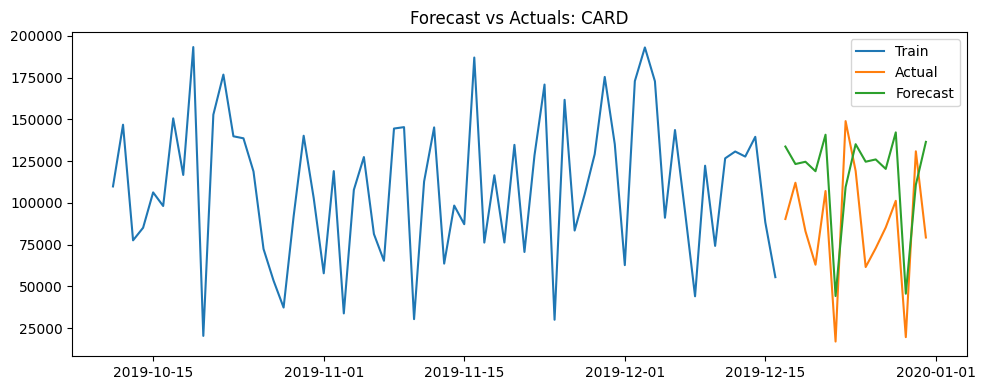


 Forecast and Evaluation for Payment Mode: CASH
MAE: 38633.38, RMSE: 51583.47, MAPE: 33.28%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\326386913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, us

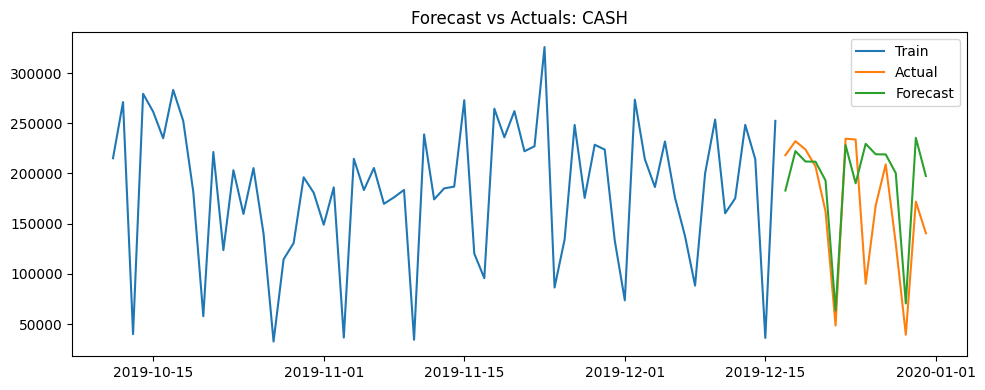


 Forecast and Evaluation for Payment Mode: PREPAID
MAE: 39414.30, RMSE: 48879.44, MAPE: 126.63%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\326386913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, us

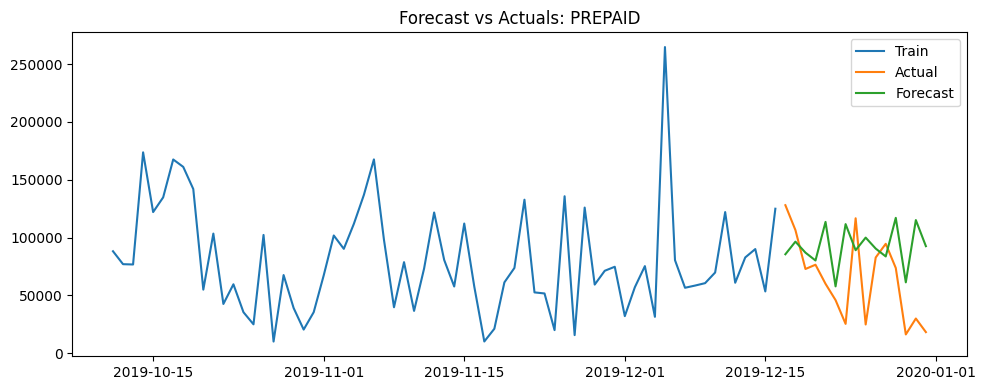


 Forecast and Evaluation for Payment Mode: TPA
MAE: 57218.67, RMSE: 70989.68, MAPE: 42.86%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\326386913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, us

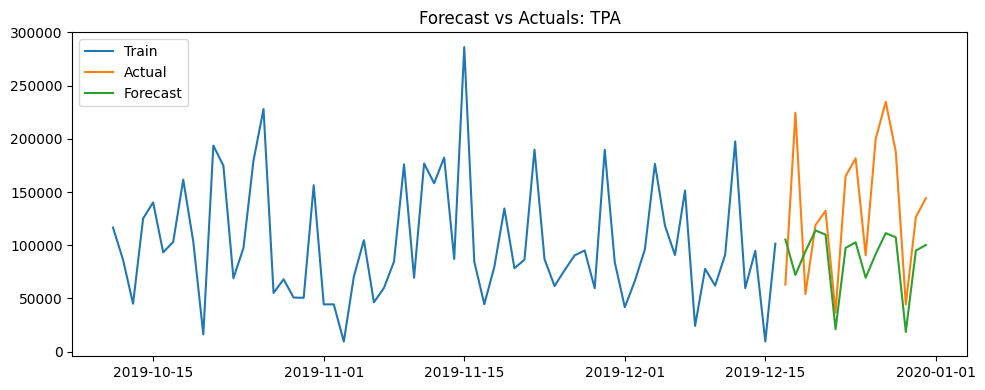


 Forecast and Evaluation for Payment Mode: CHEQUE
MAE: 12857.71, RMSE: 17384.24, MAPE: 65.91%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\326386913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, us

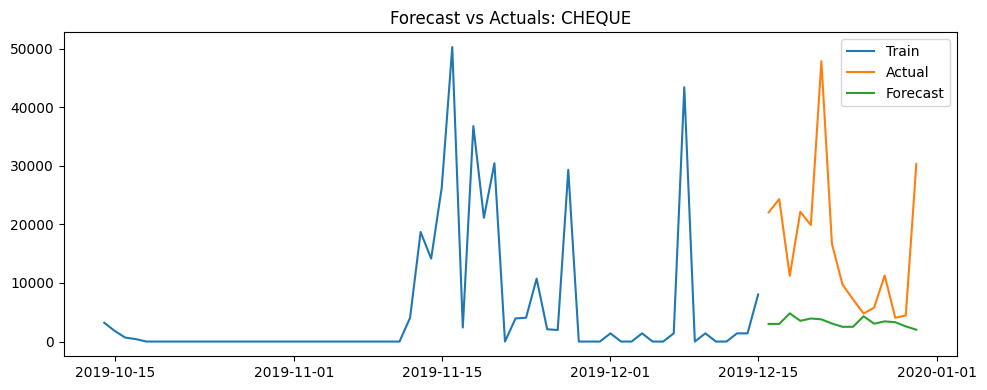


 Forecast and Evaluation for Payment Mode: RTGS
MAE: 7812.55, RMSE: 12061.36, MAPE: 1734.96%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\326386913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, us

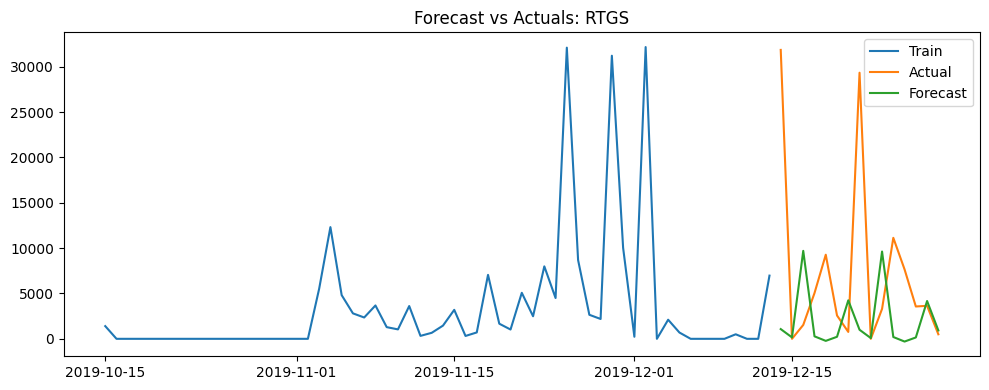


 Forecast and Evaluation for Payment Mode: FREE
MAE: 1989.16, RMSE: 2303.03, MAPE: 24004.01%


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30444\326386913.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Amount'].fillna(0, inplace=True)
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, us

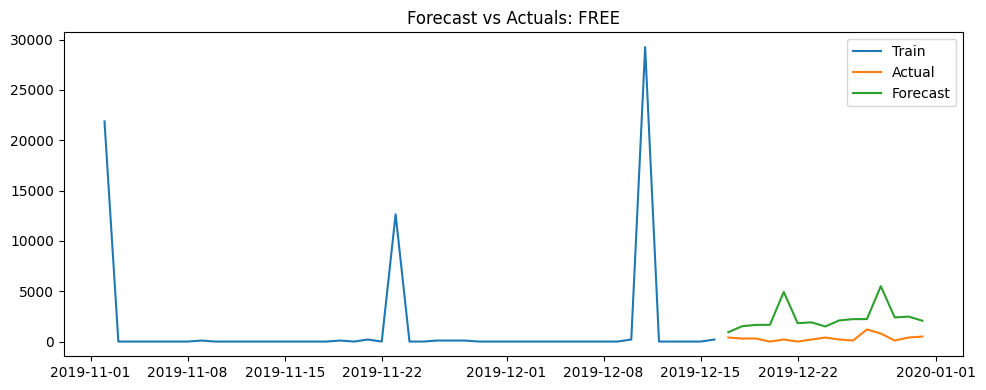

In [21]:
all_forecasts = {}
accuracy_metrics = {}

for mode in payment_modes:
    print(f"\n Forecast and Evaluation for Payment Mode: {mode}")
    
    data = Bill_details[Bill_details['Last Pay Mode'] == mode]
    data = data[['bill_date_only', 'Net Amount']]
    data = data.set_index('bill_date_only').asfreq('D')
    data['Net Amount'].fillna(0, inplace=True)
    
    if len(data) < 30:  # Ensure there's enough data for training + 15-day test
        print("Not enough data to evaluate this mode.")
        continue

    # Split data: last 15 days for testing
    train_data = data.iloc[:-15]
    test_data = data.iloc[-15:]
    
    # Fit the model on training data
    try:
        model = ExponentialSmoothing(
            train_data['Net Amount'],
            trend='add',
            seasonal='add',
            seasonal_periods=7
        ).fit()
    except Exception as e:
        print(f"Model failed for {mode}: {e}")
        continue
    
    # Forecast the next 15 days
    forecast = model.forecast(15)
    all_forecasts[mode] = forecast

    # Calculate accuracy metrics
    mae = mean_absolute_error(test_data['Net Amount'], forecast)
    rmse = mean_squared_error(test_data['Net Amount'], forecast, squared=False)
    mape = (abs((test_data['Net Amount'] - forecast) / test_data['Net Amount'].replace(0, 1))).mean() * 100

    accuracy_metrics[mode] = {
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'MAPE': round(mape, 2)
    }

    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

    # Optional: Visual comparison plot
    plt.figure(figsize=(10, 4))
    plt.plot(train_data.index, train_data['Net Amount'], label='Train')
    plt.plot(test_data.index, test_data['Net Amount'], label='Actual')
    plt.plot(test_data.index, forecast, label='Forecast')
    plt.title(f"Forecast vs Actuals: {mode}")
    plt.legend()
    plt.tight_layout()
    plt.show()


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 Forecast for Total Net Billing:
2019-12-17    521821.798098
2019-12-18    502032.975091
2019-12-19    519375.193669
2019-12-20    516164.188158
2019-12-21    574901.279313
2019-12-22    182179.421291
2019-12-23    556203.384109
2019-12-24    517389.351238
2019-12-25    497600.528231
2019-12-26    514942.746808
2019-12-27    511731.741298
2019-12-28    570468.832452
2019-12-29    177746.974430
2019-12-30    551770.937249
2019-12-31    512956.904377
Freq: D, dtype: float64

 Accuracy Metrics:
MAE: 80718.96
RMSE: 103635.07
MAPE: 19.97%


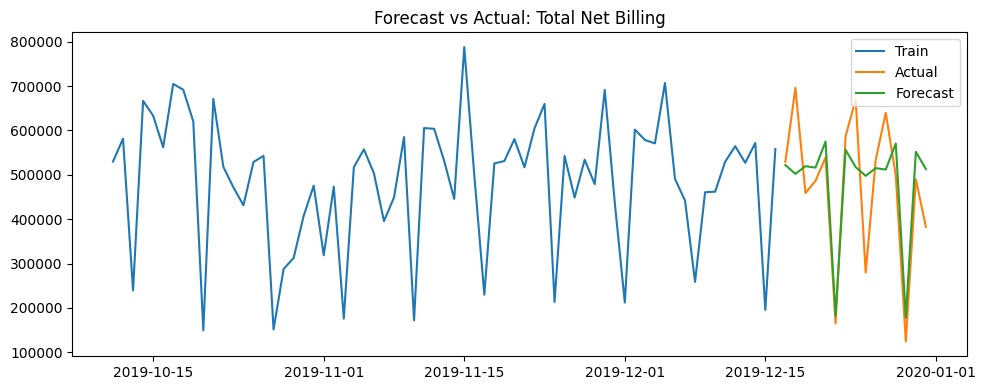

In [22]:
# Step 1: Aggregate total net amount by date
Total_bill = Bill_details.groupby('bill_date_only')['Net Amount'].sum().reset_index()
Total_bill.rename(columns={'Net Amount': 'Net_total'}, inplace=True)

# Step 2: Prepare time series data
data_total = Total_bill.set_index('bill_date_only').asfreq('D')
data_total['Net_total'] = data_total['Net_total'].fillna(0)

# Step 3: Train-test split (last 15 days as test)
if len(data_total) < 30:
    print("Not enough data to evaluate total forecast accurately.")
else:
    train_total = data_total.iloc[:-15]
    test_total = data_total.iloc[-15:]

    # Step 4: Fit model on training data
    model = ExponentialSmoothing(
        train_total['Net_total'],
        trend='add',
        seasonal='add',
        seasonal_periods=7
    ).fit()

    # Step 5: Forecast
    forecast_total = model.forecast(15)

    # Step 6: Evaluate forecast
    mae_total = mean_absolute_error(test_total['Net_total'], forecast_total)
    rmse_total = mean_squared_error(test_total['Net_total'], forecast_total, squared=False)
    mape_total = (abs((test_total['Net_total'] - forecast_total) / test_total['Net_total'].replace(0, 1))).mean() * 100

    print(" Forecast for Total Net Billing:")
    print(forecast_total)

    print("\n Accuracy Metrics:")
    print(f"MAE: {mae_total:.2f}")
    print(f"RMSE: {rmse_total:.2f}")
    print(f"MAPE: {mape_total:.2f}%")

    # Step 7: Plot forecast vs actual
    plt.figure(figsize=(10, 4))
    plt.plot(train_total.index, train_total['Net_total'], label='Train')
    plt.plot(test_total.index, test_total['Net_total'], label='Actual')
    plt.plot(test_total.index, forecast_total, label='Forecast')
    plt.title("Forecast vs Actual: Total Net Billing")
    plt.legend()
    plt.tight_layout()
    plt.show()
